#### Loading data

https://www.datacamp.com/community/tutorials/tensorflow-tutorial


https://github.com/waleedka/traffic-signs-tensorflow

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
Root_path ="/home/kamlesh/AnacondaProjects/DeepLearning/Projects"

import os
import skimage.data 
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                  if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

train_data_directory = os.path.join(Root_path, "traffic_signs/Training")
test_data_directory = os.path.join(Root_path,"traffic_signs/Testing")


train_images, train_labels = load_data(train_data_directory)
test_images, test_labels = load_data(test_data_directory)

In [15]:
print("total trainning examples are = "+ str(len(np.array(train_images))))
print("shape of train_images is= "+ str(np.array(train_images).shape))
print("total training labels are = " + str (len(set(train_labels))))
print("train_images is list in type convert them into np.ndarry for further processing")
print("total testing examples are = "+ str(len(np.array(test_images))))


total trainning examples are = 4575
shape of train_images is= (4575,)
total training labels are = 62
train_images is list in type convert them into np.ndarry for further processing
total testing examples are = 2520


In [4]:
#conversion to ndarray with numpy
""""
train_images= np.array(train_images)
train_labels = np.array(test_images)

test_images = np.array(test_images)
test_labels = np.array(test_labels)
"""

'"\ntrain_images= np.array(train_images)\ntrain_labels = np.array(test_images)\n\ntest_images = np.array(test_images)\ntest_labels = np.array(test_labels)\n'

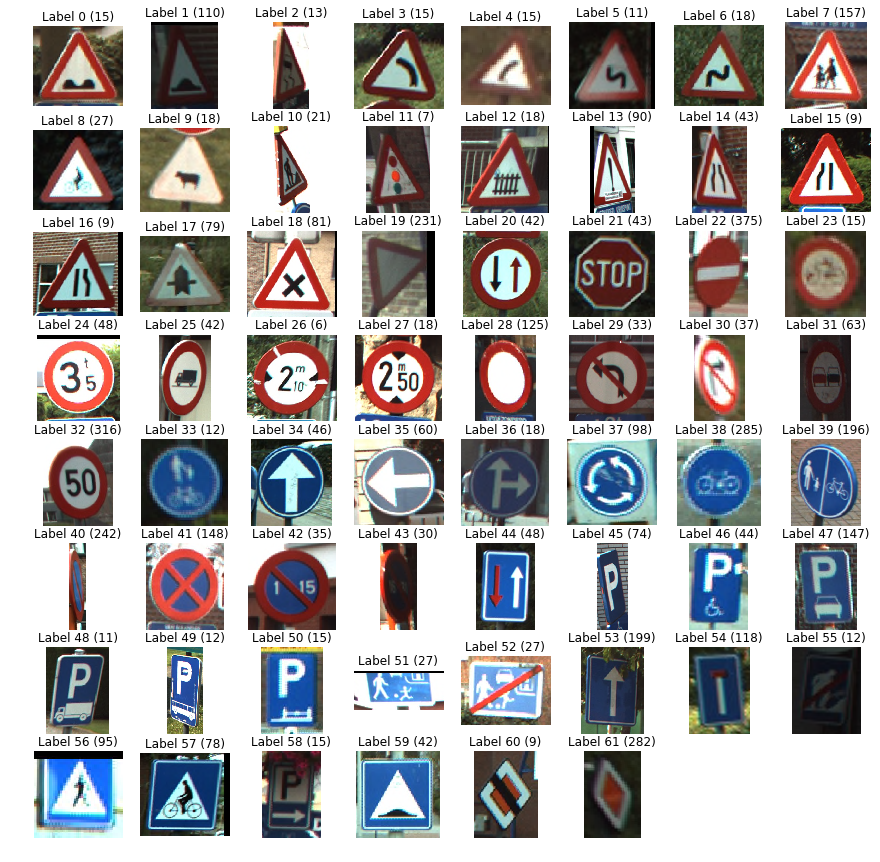

In [15]:
def plot_1_image(labels, images):
    # Get the unique labels 
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # pick the first image for each label
        image = images[labels.index(label)]
        # Define 64 subplots 
        plt.subplot(8, 8, i)
        # Don't include axes
        plt.axis('off')
        # Add a title to each subplot 
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        # Add 1 to the counter
        i += 1
        # And  plot this first image 
        plt.imshow(image)
    
        # Show the plot
    plt.show()
        
plot_1_image(train_labels,train_images)        

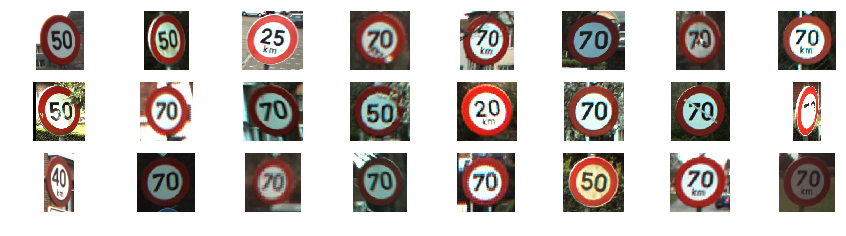

In [18]:
def display_label_images(images,labels,label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(4, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(train_images,train_labels, 32)

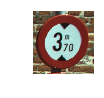

shape: (183, 176, 3), min: 0, max: 255


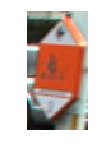

shape: (94, 48, 3), min: 2, max: 255


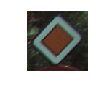

shape: (83, 84, 3), min: 8, max: 164


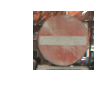

shape: (124, 128, 3), min: 20, max: 255


In [19]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(train_images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(train_images[traffic_signs[i]].shape, 
                                                  train_images[traffic_signs[i]].min(), 
                                                  train_images[traffic_signs[i]].max()))

#### All images are of different sizes, need to have a fixed dimensions for all the images 

In [21]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
train_images32 = [transform.resize(image, (32, 32)) for image in train_images]

test_images32 = [transform.resize(image, (32, 32)) for image in test_images]

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [22]:
for image in train_images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 0.02877604166666653, max: 0.9971823299632354
shape: (32, 32, 3), min: 0.07313112745098044, max: 0.9671262254901946
shape: (32, 32, 3), min: 0.07292815563725678, max: 1.0
shape: (32, 32, 3), min: 0.02377833946078415, max: 1.0
shape: (32, 32, 3), min: 0.007220818014705973, max: 0.8366622625612726


In [23]:
labels_a = np.array(train_labels)
images_a = np.array(train_images32)
print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

labels:  (4575,) 
images:  (4575, 32, 32, 3)


In [24]:
# Create a graph to hold the model.
graph = tf.Graph()

# Create model in the graph.
with graph.as_default():
    # Placeholders for inputs and labels.
    images_ph = tf.placeholder(tf.float32, [None, 32, 32, 3])
    labels_ph = tf.placeholder(tf.int32, [None])

    # Flatten input from: [None, height, width, channels]
    # To: [None, height * width * channels] == [None, 3072]
    images_flat = tf.contrib.layers.flatten(images_ph)

    # Fully connected layer. 
    # Generates logits of size [None, 62]
    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

    # Convert logits to label indexes (int).
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(logits, 1)

    # Define the loss function. 
    # Cross-entropy is a good choice for classification.
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))

    # Create training op.
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # And, finally, an initialization op to execute before training.
    init = tf.global_variables_initializer()

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 3072), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [25]:
# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initialize all variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])

for i in range(201):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: images_a, labels_ph: labels_a})
    if i % 10 == 0:
        print("Loss: ", loss_value)



Loss:  4.129184
Loss:  2.7505078
Loss:  2.2566078
Loss:  2.0283248
Loss:  1.8952984
Loss:  1.8045117
Loss:  1.7362012
Loss:  1.6813538
Loss:  1.6355542
Loss:  1.5965514
Loss:  1.5627335
Loss:  1.5330209
Loss:  1.5064664
Loss:  1.4827588
Loss:  1.4615327
Loss:  1.442411
Loss:  1.4250954
Loss:  1.4093295
Loss:  1.394901
Loss:  1.3816402
Loss:  1.3694112


In [29]:
# Pick 10 random images
sample_indexes = random.sample(range(len(train_images32)), 10)
sample_images = [train_images32[i] for i in sample_indexes]
sample_labels = [labels_a[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: sample_images})[0]
print(sample_labels)
print(predicted)

[37, 38, 61, 37, 28, 13, 28, 1, 47, 46]
[37 38 61 37 28 13 28  1 47 47]


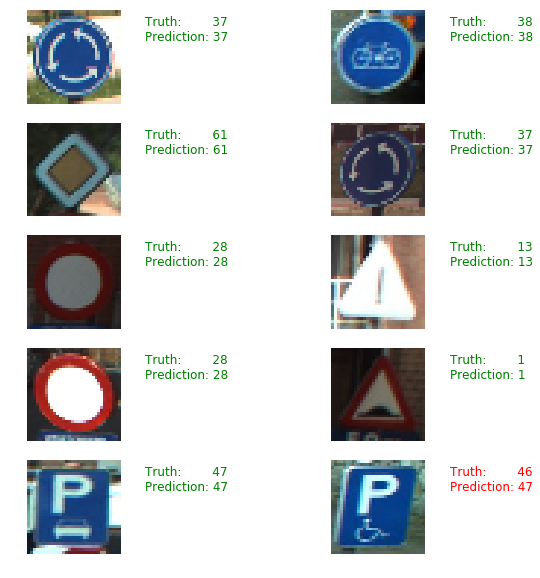

In [34]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])
plt.show()    

#### Building a Neural Network

###  As all images are of different sizes .So before flatening them we have to reize them

In [16]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
train_images32 = [transform.resize(image, (32, 32)) for image in train_images]

test_images32 = [transform.resize(image, (32, 32)) for image in test_images]

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [21]:

train_images_32= np.array(train_images32)
train_labels_32 = np.array(train_labels)

test_images_32 = np.array(test_images32)
test_labels_32 = np.array(test_labels)


In [24]:
train_images_32.shape

(4575, 32, 32, 3)

As usual you flatten the image dataset, then normalize it by dividing by 255. On top of that, you will convert each label to a one-hot vector as shown in Figure 1. Run the cell below to do so.


In [27]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C_value):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(value = C_value,dtype=tf.int32)
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices= labels,depth=C,axis = 0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run( one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return one_hot

In [30]:
# Flatten the training and test images
X_train_flatten = train_images_32.reshape(train_images_32.shape[0], -1).T #what is happening here 
X_test_flatten = test_images_32.reshape(test_images_32.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = one_hot_matrix(train_labels_32, 62)
Y_test = one_hot_matrix(test_labels_32, 62)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 4575
number of test examples = 2520
X_train shape: (3072, 4575)
Y_train shape: (62, 4575)
X_test shape: (3072, 2520)
Y_test shape: (62, 2520)


### Creating place holders for features and Y 

In [31]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 3072)
    n_y -- scalar, number of classes (from 0 to 5, so -> 62)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(dtype=tf.float32,shape=(n_x,None),name="Place_holder1")
    Y = tf.placeholder(dtype=tf.float32,shape=(n_y,None),name="Place_holder2")
    ### END CODE HERE ###
    
    return X, Y

In [92]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 3072]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [62, 12]
                        b3 : [62, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [32,3072], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [32,1], initializer = tf.zeros_initializer())
    
    W2 = tf.get_variable("W2", [24,32], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [24,1], initializer = tf.zeros_initializer())

    W3 = tf.get_variable("W3", [12,24], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [12,1], initializer = tf.zeros_initializer())
    
    
    W4 = tf.get_variable("W4", [32,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b4 = tf.get_variable("b4", [32,1], initializer = tf.zeros_initializer())
    
    W5 = tf.get_variable("W5", [62,32], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b5 = tf.get_variable("b5", [62,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                   "W4":W4,
                   "b4":b4,
                   "W5":W5,
                    "b5":b5}
    
    return parameters

In [93]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X) ,b1)                                        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1) ,b2 )                                      # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3 )                                      # Z3 = np.dot(W3,Z2) + b3
    
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4 )
    
    A4 = tf.nn.relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4),b5)
    
    ### END CODE HERE ###
    
    return Z5

In [104]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z5, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z5)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,logits=logits))
    ### END CODE HERE ###
    
    return cost

In [117]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1000, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    tf.reset_default_graph()
    #ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z5 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z5, Y)
    ### END CODE HERE ###
    
    ####REGUlarixationn extra start
    #tf.nn.l2_loss()
    beta_regular = 0.01
    weight_1 =parameters['W1']
    weight_2 = parameters['W2']
    weight_3= parameters['W3']
    weight_4 = parameters['W4']
    weight_5 = parameters['W5']
    # Loss function with L2 Regularization with beta=0.01
    regularizers = tf.nn.l2_loss(weight_1) + tf.nn.l2_loss(weight_2)  
    cost = tf.reduce_mean(cost + beta_regular * regularizers)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            _,c = sess.run([optimizer,cost], feed_dict={X: X_train, Y: Y_train})
                ### END CODE HERE ###
            epoch_cost = c

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z5), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 4.577381
Cost after epoch 100: 4.577021
Cost after epoch 200: 4.576633
Cost after epoch 300: 4.576228
Cost after epoch 400: 4.575819
Cost after epoch 500: 4.575411
Cost after epoch 600: 4.575004
Cost after epoch 700: 4.574598
Cost after epoch 800: 4.574193
Cost after epoch 900: 4.573789


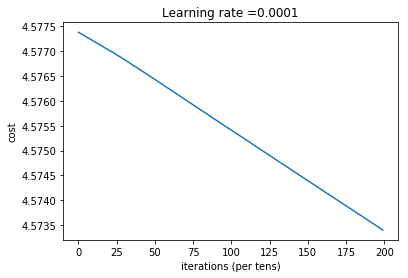

Parameters have been trained!
Train Accuracy: 0.08196721
Test Accuracy: 0.02420635


In [118]:
parameters = model(X_train, Y_train, X_test, Y_test)